In [ ]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [2]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs


For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [3]:
ultimate = [50.9, 6.60, 40.5, 0.51, 0.34, 0]
ash = 0.0114
moist = 0.15
HHV = 20.6
feed = fs.create_fuel_stream(1, ultimate, ash, moist, HHV)

In [4]:
T1 = 1000 # K
T2 = 1100 # K
ERs = np.arange(0.0, 1.0+1E-9, 0.01)
outs1 = []
outs2 = []

for i, er in enumerate(ERs):
    air = fs.create_air_from_ER(feed, er)
    outlet1 = gs.gasify_isot(feed, air, T=T1, P=ct.one_atm, charFormation=0, directMethaneConv=0)
    outs1.append(outlet1)
    outlet2 = gs.gasify_isot(feed, air, T=T2, P=ct.one_atm, charFormation=0, directMethaneConv=0)
    outs2.append(outlet2)

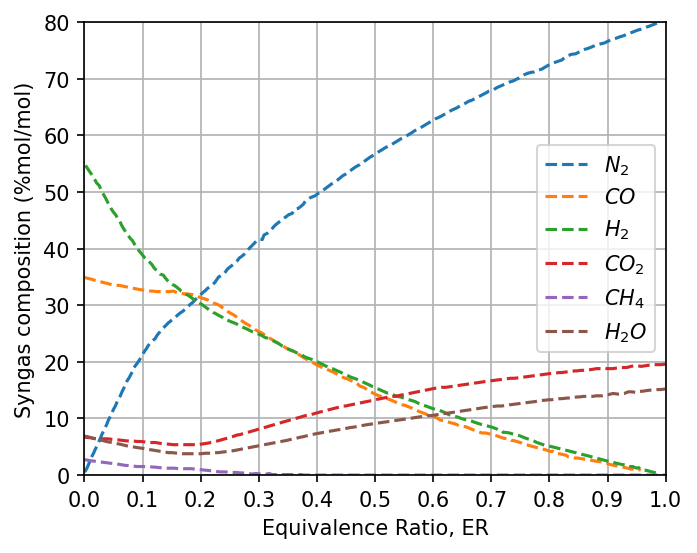

In [5]:
li_graph = pd.read_excel('data/li_graph.xlsx')
fig1 = plt.figure(figsize=(5,4), dpi=150)
plt.plot(li_graph['ER3'], li_graph['N2'], label='$N_2$', linestyle='--')
plt.plot(li_graph['ER2'], li_graph['CO'], label='$CO$', linestyle='--')
plt.plot(li_graph['ER1'], li_graph['H2'], label='$H_2$', linestyle='--')
plt.plot(li_graph['ER4'], li_graph['CO2'], label='$CO_2$', linestyle='--')
plt.plot(li_graph['ER6'], li_graph['CH4'], label='$CH_4$', linestyle='--')
plt.plot(li_graph['ER5'], li_graph['H2O'], label='$H_2O$', linestyle='--')
plt.xlim(0, 1)
plt.ylim(0, 80)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-9, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.savefig('figures/li0.png')
plt.show()

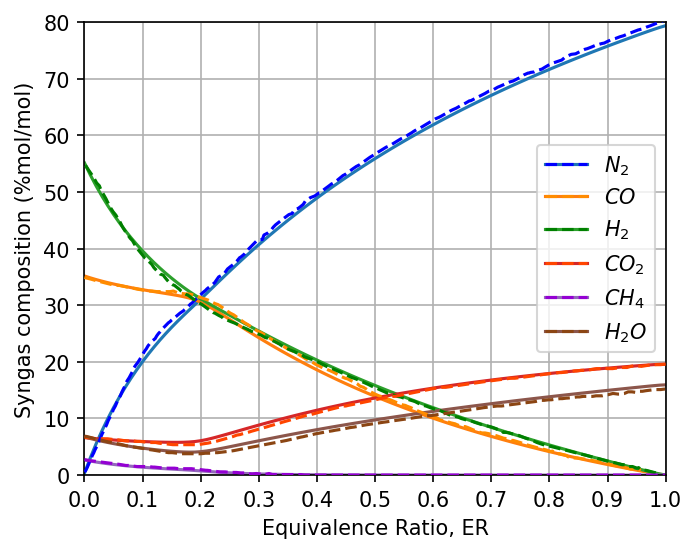

In [6]:
colors1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
colors2 = ['blue', 'darkorange', 'green', 'orangered', 'darkviolet', 'saddlebrown']
fig1, ax1 = plt.subplots(figsize=(5,4), dpi=150)
m1, = ax1.plot(ERs, [100*out.get_syngas_fraction('N2', water=False, nitrogen=True) for out in outs1], zorder=2, color=colors1[0])
m2, = ax1.plot(ERs, [100*out.get_syngas_fraction('CO', water=False, nitrogen=True) for out in outs1], zorder=2, color=colors1[1])
m3, = ax1.plot(ERs, [100*out.get_syngas_fraction('H2', water=False, nitrogen=True) for out in outs1], zorder=2, color=colors1[2])
m4, = ax1.plot(ERs, [100*out.get_syngas_fraction('CO2', water=False, nitrogen=True) for out in outs1], zorder=2, color=colors1[3])
m5, = ax1.plot(ERs, [100*out.get_syngas_fraction('CH4', water=False, nitrogen=True) for out in outs1], zorder=2, color=colors1[4])
m6, = ax1.plot(ERs, [100*out.get_syngas_fraction('H2O', water=True, nitrogen=True) for out in outs1], zorder=2, color=colors1[5])
n1, = ax1.plot(li_graph['ER3'], li_graph['N2'], linestyle='--',zorder=3, color=colors2[0])
n2, = ax1.plot(li_graph['ER2'], li_graph['CO'], linestyle='--', zorder=3, color=colors2[1])
n3, = ax1.plot(li_graph['ER1'], li_graph['H2'], linestyle='--', zorder=3, color=colors2[2])
n4, = ax1.plot(li_graph['ER4'], li_graph['CO2'], linestyle='--', zorder=3, color=colors2[3])
n5, = ax1.plot(li_graph['ER6'], li_graph['CH4'], linestyle='--', zorder=3, color=colors2[4])
n6, = ax1.plot(li_graph['ER5'], li_graph['H2O'], linestyle='--', zorder=3, color=colors2[5])
plt.xlim(0, 1)
plt.ylim(0, 80)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-9, 0.1))
l = ax1.legend([(m1, n1),(m2, n2),(m3,n3),(m4,n4),(m5,n5),(m6,n6)], ['$N_2$', '$CO$', '$H_2$', '$CO_2$', '$CH_4$', '$H_2O$'])
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
ax1.grid()
plt.savefig('figures/li1.png')
plt.show()

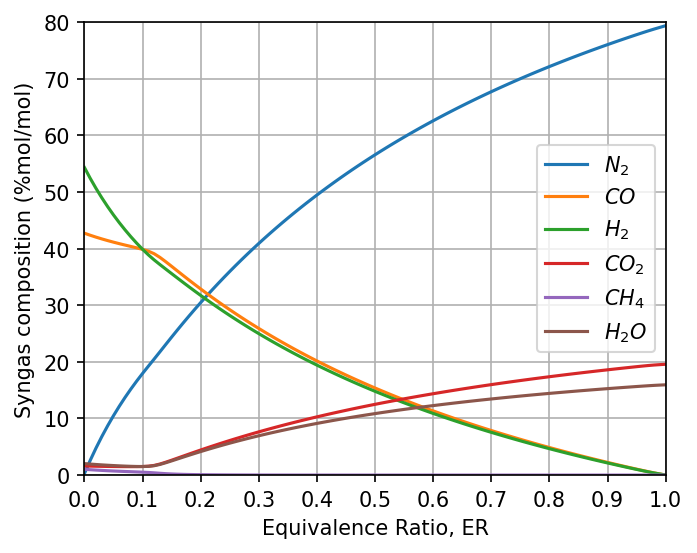

In [7]:
species = ['N2', 'CO', 'H2', 'CO2', 'CH4']
labels = ['$N_2$', '$CO$', '$H_2$', '$CO_2$', '$CH_4$']
fig2 = plt.figure(figsize=(5,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(ERs, [100*out.get_syngas_fraction(sp, water=False, nitrogen=True) for out in outs2], label=labels[i])
plt.plot(ERs, [100*out.get_syngas_fraction('H2O', water=True, nitrogen=True) for out in outs2], label='$H_2O$')
# plt.plot(ERs, [100*out.species_moles[phases.indices['C(gr)']]/(sum(out.species_moles) - out.species_moles[phases.indices['H2O']]) for out in outs1], label='$C$')
plt.xlim(0, 1)
plt.ylim(0, 80)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-9, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.savefig('figures/li2.png')
plt.show()